Spotify Music Analysis

In [1]:
#Data Set - Spotify 2010 - 2019 Top 100 Songs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#from pandas.plotting import autocorrelation_plot
#import seaborn as sns
#from pandas.plotting import scatter_matrix
#from pandas.plotting import autocorrelation_plot
#from pandas.plotting import parallel_coordinates
#from pandas.plotting import lag_plot

In [2]:
df = pd.read_csv("Spotify 2010 - 2019 Top 100.csv")

In [3]:
df.columns

Index(['title', 'artist', 'top genre', 'year released', 'added', 'bpm', 'nrgy',
       'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop', 'top year',
       'artist type'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          1000 non-null   object
 1   artist         1000 non-null   object
 2   top genre      1000 non-null   object
 3   year released  1000 non-null   int64 
 4   added          1000 non-null   object
 5   bpm            1000 non-null   int64 
 6   nrgy           1000 non-null   int64 
 7   dnce           1000 non-null   int64 
 8   dB             1000 non-null   int64 
 9   live           1000 non-null   int64 
 10  val            1000 non-null   int64 
 11  dur            1000 non-null   int64 
 12  acous          1000 non-null   int64 
 13  spch           1000 non-null   int64 
 14  pop            1000 non-null   int64 
 15  top year       1000 non-null   int64 
 16  artist type    1000 non-null   object
dtypes: int64(12), object(5)
memory usage: 132.9+ KB


In [5]:
df.head()

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,2022‑02‑17,140,81,61,-6,23,23,203,0,6,70,2010,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,2022‑02‑17,138,89,68,-4,36,83,192,1,8,68,2010,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010,2022‑02‑17,95,48,84,-7,9,96,243,20,3,72,2010,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,2022‑02‑17,93,87,66,-4,4,38,180,11,12,80,2010,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,2022‑02‑17,104,85,69,-6,9,74,268,39,5,79,2010,Solo


In [6]:
df.isnull().sum()

title            0
artist           0
top genre        0
year released    0
added            0
bpm              0
nrgy             0
dnce             0
dB               0
live             0
val              0
dur              0
acous            0
spch             0
pop              0
top year         0
artist type      0
dtype: int64

In [7]:
df = df.drop(columns=['added'])
df

,title,artist,top genre,year released,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,140,81,61,-6,23,23,203,0,6,70,2010,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,138,89,68,-4,36,83,192,1,8,68,2010,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010,95,48,84,-7,9,96,243,20,3,72,2010,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,93,87,66,-4,4,38,180,11,12,80,2010,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,104,85,69,-6,9,74,268,39,5,79,2010,Solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,SICKO MODE,Travis Scott,hip hop,2018,155,73,83,-4,12,45,313,1,22,86,2019,Solo
996,EARFQUAKE,"Tyler, The Creator",hip hop,2019,80,50,55,-9,80,41,190,23,7,85,2019,Solo
997,Boasty (feat. Idris Elba),Wiley,grime,2019,103,77,89,-5,9,46,177,1,7,68,2019,Solo
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,2019,138,58,53,-6,10,59,214,1,10,67,2019,Duo


In [8]:
df["top genre"].value_counts() # 132 top genres for categories 

dance pop           361
pop                  57
atl hip hop          39
art pop              37
boy band             21
                   ... 
downtempo             1
eau claire indie      1
german pop            1
canadian indie        1
social media pop      1
Name: top genre, Length: 132, dtype: int64

In [9]:
#Use encoder to create values for the Categories in Top Genre
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df['genre_cat']= ""
df['genre_cat'] = ord_enc.fit_transform(df[["top genre"]])
df[['top genre', 'genre_cat']].head()


,top genre,genre_cat
0,dance pop,51.0
1,dance pop,51.0
2,pop soul,122.0
3,atl hip hop,14.0
4,atl hip hop,14.0


In [10]:
df

,title,artist,top genre,year released,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type,genre_cat
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,140,81,61,-6,23,23,203,0,6,70,2010,Duo,51.0
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,138,89,68,-4,36,83,192,1,8,68,2010,Duo,51.0
2,I Need A Dollar,Aloe Blacc,pop soul,2010,95,48,84,-7,9,96,243,20,3,72,2010,Solo,122.0
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,93,87,66,-4,4,38,180,11,12,80,2010,Solo,14.0
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,104,85,69,-6,9,74,268,39,5,79,2010,Solo,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,SICKO MODE,Travis Scott,hip hop,2018,155,73,83,-4,12,45,313,1,22,86,2019,Solo,85.0
996,EARFQUAKE,"Tyler, The Creator",hip hop,2019,80,50,55,-9,80,41,190,23,7,85,2019,Solo,85.0
997,Boasty (feat. Idris Elba),Wiley,grime,2019,103,77,89,-5,9,46,177,1,7,68,2019,Solo,83.0
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,2019,138,58,53,-6,10,59,214,1,10,67,2019,Duo,4.0


In [11]:
#Use encoder to create values for the Categories in Artist type

ord_enc = OrdinalEncoder()
df['artist_cat']= ""
df['artist_cat'] = ord_enc.fit_transform(df[["artist type"]])
df[['artist type', 'artist_cat']].head()

,artist type,artist_cat
0,Duo,1.0
1,Duo,1.0
2,Solo,2.0
3,Solo,2.0
4,Solo,2.0


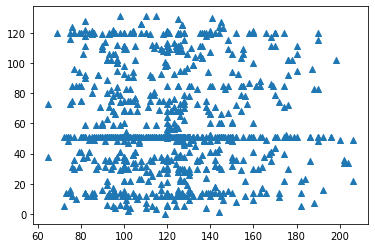

In [12]:
plt.scatter(df.bpm ,df.genre_cat,marker="^")
plt.show()

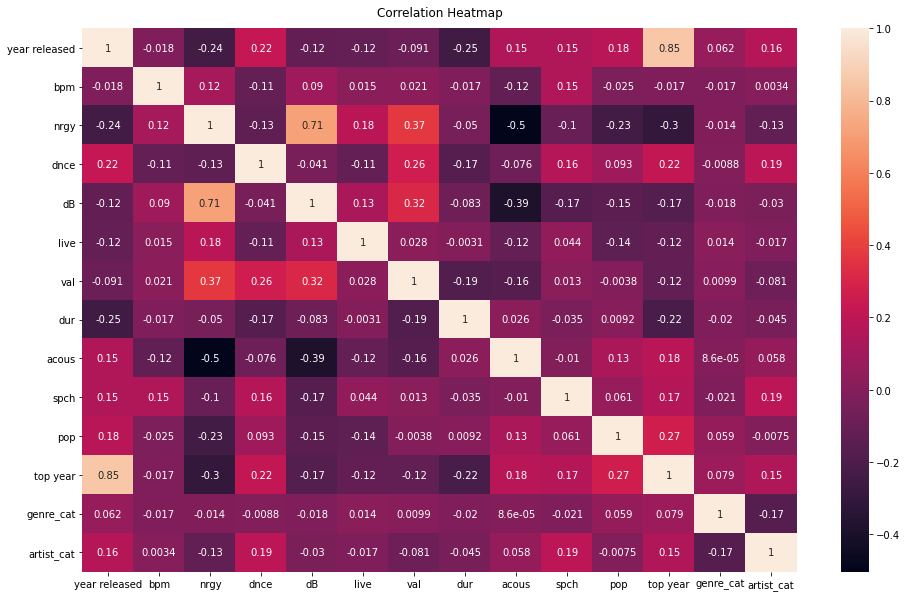

In [13]:
import seaborn as sns

plt.figure(figsize=(16,10))

corr_heat = sns.heatmap(df.corr(), annot=True)
corr_heat.set_title("Correlation Heatmap", pad=12);
plt.show()

There is a high correlation between genre and top year. This implies that certain genres are popular in a specific year.

# Recommendation System using K-means Clustering

In [14]:
# Drop song duplicates
def drop_duplicates(df):
    df['artists_songs'] = df.apply(lambda row: row['artist'] + row['title'], axis = 1)
    return df.drop_duplicates('artists_songs')

In [15]:
df = df.drop_duplicates(subset='title')
df

,title,artist,top genre,year released,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type,genre_cat,artist_cat
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,140,81,61,-6,23,23,203,0,6,70,2010,Duo,51.0,1.0
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,138,89,68,-4,36,83,192,1,8,68,2010,Duo,51.0,1.0
2,I Need A Dollar,Aloe Blacc,pop soul,2010,95,48,84,-7,9,96,243,20,3,72,2010,Solo,122.0,2.0
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,93,87,66,-4,4,38,180,11,12,80,2010,Solo,14.0,2.0
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,104,85,69,-6,9,74,268,39,5,79,2010,Solo,14.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,You Need To Calm Down,Taylor Swift,pop,2019,85,67,77,-6,6,71,171,1,6,81,2019,Solo,120.0,2.0
996,EARFQUAKE,"Tyler, The Creator",hip hop,2019,80,50,55,-9,80,41,190,23,7,85,2019,Solo,85.0,2.0
997,Boasty (feat. Idris Elba),Wiley,grime,2019,103,77,89,-5,9,46,177,1,7,68,2019,Solo,83.0,2.0
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,2019,138,58,53,-6,10,59,214,1,10,67,2019,Duo,4.0,1.0


In [16]:
df_subset = df[['title', 'artist', 'top genre', 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'acous', 'spch', 'pop']]
df_subset

,title,artist,top genre,bpm,nrgy,dnce,dB,live,val,acous,spch,pop
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,140,81,61,-6,23,23,0,6,70
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,138,89,68,-4,36,83,1,8,68
2,I Need A Dollar,Aloe Blacc,pop soul,95,48,84,-7,9,96,20,3,72
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,93,87,66,-4,4,38,11,12,80
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,104,85,69,-6,9,74,39,5,79
...,...,...,...,...,...,...,...,...,...,...,...,...
994,You Need To Calm Down,Taylor Swift,pop,85,67,77,-6,6,71,1,6,81
996,EARFQUAKE,"Tyler, The Creator",hip hop,80,50,55,-9,80,41,23,7,85
997,Boasty (feat. Idris Elba),Wiley,grime,103,77,89,-5,9,46,1,7,68
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,138,58,53,-6,10,59,1,10,67


In [17]:
import copy
import random

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from scipy.spatial import distance
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

In [18]:
df1=copy.deepcopy(df_subset)
df1.drop(columns=['title','artist','top genre', 'pop', 'spch'],inplace=True)
df1

,bpm,nrgy,dnce,dB,live,val,acous
0,140,81,61,-6,23,23,0
1,138,89,68,-4,36,83,1
2,95,48,84,-7,9,96,20
3,93,87,66,-4,4,38,11
4,104,85,69,-6,9,74,39
...,...,...,...,...,...,...,...
994,85,67,77,-6,6,71,1
996,80,50,55,-9,80,41,23
997,103,77,89,-5,9,46,1
998,138,58,53,-6,10,59,1


In [19]:
from sklearn.preprocessing import MinMaxScaler

d_types = ['int16','int32', 'int64', 'float16', 'float32', 'float64']
normalize = df1.select_dtypes(include=d_types)

# Define Min-Max Scaler
scaler = MinMaxScaler()
# Transform data
normalize = scaler.fit_transform(normalize)

print(normalize)

[[0.53191489 0.81521739 0.54545455 ... 0.25925926 0.20430108 0.        ]
 [0.5177305  0.90217391 0.63636364 ... 0.41975309 0.84946237 0.01020408]
 [0.21276596 0.45652174 0.84415584 ... 0.08641975 0.98924731 0.20408163]
 ...
 [0.26950355 0.77173913 0.90909091 ... 0.08641975 0.4516129  0.01020408]
 [0.5177305  0.56521739 0.44155844 ... 0.09876543 0.59139785 0.01020408]
 [0.23404255 0.57608696 0.79220779 ... 0.13580247 0.15053763 0.02040816]]


In [20]:
from sklearn.model_selection import GridSearchCV

rand_seed = random.seed(42)
kmeans = KMeans(init='k-means++', max_iter=100, n_init=10)  # updated the parameters
params = {"n_clusters": list(range(2, 96)),}

grid_clf = GridSearchCV(estimator=kmeans, param_grid=params, cv=10, verbose=2)
grid_clf.fit(normalize)

Fitting 10 folds for each of 94 candidates, totalling 940 fits
[CV] END .......................................n_clusters=2; total time=   0.2s
[CV] END .......................................n_clusters=2; total time=   0.1s
[CV] END .......................................n_clusters=2; total time=   0.1s
[CV] END .......................................n_clusters=2; total time=   0.1s
[CV] END .......................................n_clusters=2; total time=   0.2s
[CV] END .......................................n_clusters=2; total time=   0.1s
[CV] END .......................................n_clusters=2; total time=   0.1s
[CV] END .......................................n_clusters=2; total time=   0.1s
[CV] END .......................................n_clusters=2; total time=   0.1s
[CV] END .......................................n_clusters=2; total time=   0.1s
[CV] END .......................................n_clusters=3; total time=   0.1s
[CV] END .....................................

GridSearchCV(cv=10, estimator=KMeans(max_iter=100),
             param_grid={'n_clusters': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                        14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                        24, 25, 26, 27, 28, 29, 30, 31, ...]},
             verbose=2)

# Model Evaluation using best_score_

In [21]:
# optimal value for k (kmeans_n_cluster)
print(grid_clf.best_params_)
print(grid_clf.best_score_)  # closer to 0 the better

# model prediction
predict = grid_clf.predict(normalize)

{'n_clusters': 94}
-4.887788869609609


In [22]:
# add predict column to df_subset
df_subset['predict'] = predict
df_subset

,title,artist,top genre,bpm,nrgy,dnce,dB,live,val,acous,spch,pop,predict
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,140,81,61,-6,23,23,0,6,70,22
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,138,89,68,-4,36,83,1,8,68,28
2,I Need A Dollar,Aloe Blacc,pop soul,95,48,84,-7,9,96,20,3,72,40
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,93,87,66,-4,4,38,11,12,80,37
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,104,85,69,-6,9,74,39,5,79,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,You Need To Calm Down,Taylor Swift,pop,85,67,77,-6,6,71,1,6,81,48
996,EARFQUAKE,"Tyler, The Creator",hip hop,80,50,55,-9,80,41,23,7,85,83
997,Boasty (feat. Idris Elba),Wiley,grime,103,77,89,-5,9,46,1,7,68,64
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,138,58,53,-6,10,59,1,10,67,6


# K-Means to Generate Rating Column

In [23]:
normalize_cols = ['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'acous', 'spch', 'pop']
df_subset[normalize_cols] = df_subset[normalize_cols].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

df_subset.head()

,title,artist,top genre,bpm,nrgy,dnce,dB,live,val,acous,spch,pop,predict
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,0.531915,0.815217,0.545455,0.705882,0.259259,0.204301,0.000000,0.078431,0.583333,22
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,0.517730,0.902174,0.636364,0.823529,0.419753,0.849462,0.010204,0.117647,0.550000,28
2,I Need A Dollar,Aloe Blacc,pop soul,0.212766,0.456522,0.844156,0.647059,0.086420,0.989247,0.204082,0.019608,0.616667,40
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,0.198582,0.880435,0.610390,0.823529,0.024691,0.365591,0.112245,0.196078,0.750000,37
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,0.276596,0.858696,0.649351,0.705882,0.086420,0.752688,0.397959,0.058824,0.733333,24


In [24]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

rating_train, rating_test = train_test_split(df_subset, train_size=0.7, random_state=42)

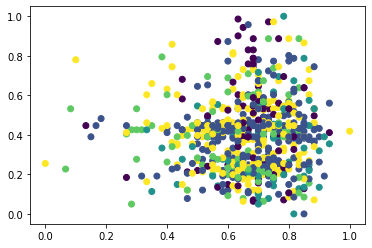

In [25]:
import matplotlib.pyplot as plt

rating_kmeans = KMeans(n_clusters=5, random_state=42)
rating_fit = rating_kmeans.fit_predict(rating_train.iloc[:, 3:11])
rating_predict = rating_kmeans.predict(rating_test.iloc[:, 3:11])

plt.scatter(rating_train.iloc[:, 11], rating_train.iloc[:, 3], c=rating_fit)
plt.show()

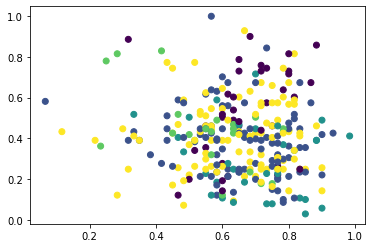

In [26]:
plt.scatter(rating_test.iloc[:, 11], rating_test.iloc[:, 3], c=rating_predict)
plt.show()

In [27]:
rating_train['rating'] = rating_fit.tolist()
rating_train.head()

,title,artist,top genre,bpm,nrgy,dnce,dB,live,val,acous,spch,pop,predict,rating
293,50 Ways to Say Goodbye,Train,dance pop,0.531915,0.956522,0.519481,0.882353,0.148148,0.752688,0.000000,0.058824,0.633333,13,1
460,Jealous - Remix,Nick Jonas,dance pop,0.198582,0.706522,0.636364,0.823529,0.518519,0.440860,0.010204,0.117647,0.600000,7,3
417,New Flame (feat. Usher & Rick Ross),Chris Brown,dance pop,0.546099,0.619565,0.662338,0.823529,0.098765,0.440860,0.051020,0.039216,0.633333,62,4
440,Don't Tell 'Em,Jeremih,chicago rap,0.234043,0.510870,0.870130,0.764706,0.111111,0.376344,0.397959,0.156863,0.750000,70,2
891,SICKO MODE,Travis Scott,hip hop,0.638298,0.728261,0.831169,0.823529,0.123457,0.440860,0.010204,0.392157,0.850000,2,0


In [28]:
rating_train_subset = rating_train[['title', 'rating']]
rating_train_subset.head()

,title,rating
293,50 Ways to Say Goodbye,1
460,Jealous - Remix,3
417,New Flame (feat. Usher & Rick Ross),4
440,Don't Tell 'Em,2
891,SICKO MODE,0


In [29]:
rating_test['rating'] = rating_predict.tolist()

In [30]:
rating_test_subset = rating_test[['title', 'rating']]
rating_test_subset.head()

,title,rating
897,If You're Over Me,1
343,Radioactive,3
287,I Knew You Were Trouble.,1
30,Whatcha Say,1
169,Midnight City,4


In [31]:
ratings = pd.concat([rating_train_subset, rating_test_subset])

In [32]:
len(ratings)

945

Data with ratings

In [33]:
df_subset_with_ratings = df_subset.merge(ratings)
len(df_subset_with_ratings)

945

In [34]:
df_subset_with_ratings.head()

,title,artist,top genre,bpm,nrgy,dnce,dB,live,val,acous,spch,pop,predict,rating
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,0.531915,0.815217,0.545455,0.705882,0.259259,0.204301,0.000000,0.078431,0.583333,22,4
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,0.517730,0.902174,0.636364,0.823529,0.419753,0.849462,0.010204,0.117647,0.550000,28,3
2,I Need A Dollar,Aloe Blacc,pop soul,0.212766,0.456522,0.844156,0.647059,0.086420,0.989247,0.204082,0.019608,0.616667,40,1
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,0.198582,0.880435,0.610390,0.823529,0.024691,0.365591,0.112245,0.196078,0.750000,37,4
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,0.276596,0.858696,0.649351,0.705882,0.086420,0.752688,0.397959,0.058824,0.733333,24,1


In [35]:
df_subset_with_ratings['rating'] = df_subset_with_ratings['rating'] + 1
df_subset_with_ratings.head()

,title,artist,top genre,bpm,nrgy,dnce,dB,live,val,acous,spch,pop,predict,rating
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,0.531915,0.815217,0.545455,0.705882,0.259259,0.204301,0.000000,0.078431,0.583333,22,5
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,0.517730,0.902174,0.636364,0.823529,0.419753,0.849462,0.010204,0.117647,0.550000,28,4
2,I Need A Dollar,Aloe Blacc,pop soul,0.212766,0.456522,0.844156,0.647059,0.086420,0.989247,0.204082,0.019608,0.616667,40,2
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,0.198582,0.880435,0.610390,0.823529,0.024691,0.365591,0.112245,0.196078,0.750000,37,5
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,0.276596,0.858696,0.649351,0.705882,0.086420,0.752688,0.397959,0.058824,0.733333,24,2


df_subset_with_ratings now has 1-5 "star" ratings for each song that has been generated by creating 5 clusters through k-means.

In [36]:
class Song_recommendation():
    def __init__(self, data):
        self.data = data
    
    def recommend_song(self, songs, amount=1):
    # recommend songs based on song title given by measuring the distance of the song (data point) from the clusters centroids
        distance = []
        song = self.data[(self.data.title.str.lower() == songs.lower())].head(1).values[0]
        rec = self.data[self.data.title.str.lower() != songs.lower()]  # to not recommend the same song
        for songs in tqdm(rec.values):
            dis = 0
            for col in np.arange(len(rec.columns)):
                if not col in [0, 1, 2, 3, 14]: # does not include rating and string columns
                    dis = dis + np.absolute(float(song[col]) - float(songs[col])) # calculate the distance of the song specified from other songs
            distance.append(dis)
        rec['distance'] = distance
        rec = rec.sort_values('distance')
        rec = rec[rec['rating'] >= 4]          # make sure songs produced have rating is at least 4
        columns = ['artist', 'title', 'top genre', 'rating']
        return rec[columns][:amount]

    def recommend_artist(self, artists, amount=1):
    # recommend artists and songs based on artist name given by measuring the distance of the data point from the clusters centroids
        distance = []
        artist = self.data[(self.data.artist.str.lower() == artists.lower())].head(1).values[0]
        rec = self.data[self.data.artist.str.lower() != artists.lower()]
        for artists in tqdm(rec.values):
            dis = 0
            for col in np.arange(len(rec.columns)):
                if not col in [0, 1, 2, 3, 14]:
                    dis = dis + np.absolute(float(artist[col]) - float(artists[col]))
            distance.append(dis)
        rec['distance'] = distance
        rec = rec.sort_values('distance')
        rec = rec[rec['rating'] >= 4]            # make sure songs produced have rating is at least 4
        columns = ['artist', 'title', 'top genre', 'rating']
        return rec[columns][:amount]

In [37]:
# Initialize recommendations
recommendations = Song_recommendation(df_subset_with_ratings)

In [38]:
recommendations.recommend_song("Over", 10)  # Canadian Hip Hop, Drake

100%|██████████| 944/944 [00:00<00:00, 16856.14it/s]


,artist,title,top genre,rating
483,Alessia Cara,Here,canadian contemporary r&b,5
594,David Guetta,This One's for You (feat. Zara Larsson) (Offic...,big room,5
198,Alesso,Years,dance pop,5
125,Coldplay,Every Teardrop Is a Waterfall,permanent wave,5
362,Of Monsters and Men,Little Talks,folk-pop,5
799,Jason Aldean,You Make It Easy,contemporary country,5
530,Mumford & Sons,Believe,modern folk rock,5
569,X Ambassadors,Unsteady,modern alternative rock,5
260,Of Monsters and Men,Dirty Paws,folk-pop,5
754,Zara Larsson,I Would Like,dance pop,5


In [39]:
recommendations.recommend_song("Animal", 10) # modern alternative rock, Neon Trees

100%|██████████| 944/944 [00:00<00:00, 18880.47it/s]


,artist,title,top genre,rating
300,Avril Lavigne,Here's to Never Growing Up,canadian pop,4
257,Neon Trees,Everybody Talks,modern alternative rock,4
25,Example,Kickstarts,dance pop,4
265,Owl City,Good Time,indietronica,4
153,Katy Perry,E.T.,dance pop,4
21,Ellie Goulding,Starry Eyed,dance pop,4
68,Scouting For Girls,This Ain't a Love Song,dance pop,4
169,Mac Miller,Donald Trump,hip hop,4
545,Sam Smith,Like I Can,dance pop,5
181,Professor Green,Read All About It,grime,5


In [40]:
recommendations.recommend_song("Riverside", 10) # dutch house, Sidney Samson

100%|██████████| 944/944 [00:00<00:00, 16557.48it/s]


,artist,title,top genre,rating
730,PNAU,Chameleon,alternative dance,5
88,Tinie Tempah,Written in the Stars (feat. Eric Turner),dance pop,5
135,Enrique Iglesias,Tonight (I'm Fuckin' You),dance pop,5
591,Clean Bandit,Tears (feat. Louisa Johnson),dance pop,5
464,ScHoolboy Q,Man Of The Year,gangster rap,5
304,Bastille,Of The Night,metropopolis,5
269,Phillip Phillips,Home,folk-pop,5
474,Tiësto,Wasted,big room,5
0,3OH!3,STARSTRUKK (feat. Katy Perry),dance pop,5
141,Grouplove,Tongue Tied,indie pop,5


In [41]:
recommendations.recommend_song("If I die young", 10) # contemporary country, the band perry

100%|██████████| 944/944 [00:00<00:00, 16562.19it/s]


,artist,title,top genre,rating
829,Post Malone,Better Now,dfw rap,5
613,James TW,When You Love Someone,neo mellow,5
693,Hayden James,NUMB,aussietronica,5
905,Lil Nas X,Panini,lgbtq+ hip hop,5
885,Halsey,Without Me,dance pop,5
437,Maroon 5,Animals,pop,4
275,Rudimental,Feel the Love (feat. John Newman),dance pop,4
65,Rihanna,Hard,barbadian pop,4
333,Imagine Dragons,Radioactive,modern rock,4
329,Fall Out Boy,My Songs Know What You Did In The Dark (Light ...,emo,4


In [42]:
recommendations.recommend_song("mine", 10) # pop , taylor swift

100%|██████████| 944/944 [00:00<00:00, 15475.75it/s]


,artist,title,top genre,rating
511,Hailee Steinfeld,Love Myself,dance pop,4
371,Rudimental,Waiting All Night (feat. Ella Eyre),dance pop,4
319,Ciara,Body Party,dance pop,4
657,Zara Larsson,Never Forget You,dance pop,5
896,Khalid,Talk (feat. Disclosure),pop,5
78,Taylor Swift,Back To December,pop,5
578,Ariana Grande,Dangerous Woman,dance pop,5
760,Ariana Grande,God is a woman,dance pop,5
337,JAY-Z,Holy Grail,east coast hip hop,5
520,Kygo,Nothing Left (feat. Will Heard),edm,5


In [43]:
recommendations.recommend_song("Dynamite", 10) # dance pop, taio cruz

100%|██████████| 944/944 [00:00<00:00, 14751.12it/s]


,artist,title,top genre,rating
739,Selena Gomez,Fetish (feat. Gucci Mane),dance pop,5
840,The Weeknd,Pray For Me (with Kendrick Lamar),canadian contemporary r&b,5
411,DJ Snake,Turn Down for What,dance pop,5
751,Travis Scott,BUTTERFLY EFFECT,hip hop,5
167,Lykke Li,I Follow Rivers - The Magician Remix,art pop,5
769,Camila Cabello,Never Be the Same,dance pop,5
785,Dynoro,In My Mind,edm,5
431,Kiesza,Hideaway,electropop,5
375,Stromae,Papaoutai,belgian pop,5
632,MØ,Final Song,art pop,5


In [44]:
recommendations.recommend_song("hard", 10) # barbarian pop, rihanna

100%|██████████| 944/944 [00:00<00:00, 15225.21it/s]


,artist,title,top genre,rating
275,Rudimental,Feel the Love (feat. John Newman),dance pop,4
437,Maroon 5,Animals,pop,4
333,Imagine Dragons,Radioactive,modern rock,4
364,One Direction,One Way or Another (Teenage Kicks),boy band,4
693,Hayden James,NUMB,aussietronica,5
211,Calvin Harris,We'll Be Coming Back (feat. Example),dance pop,4
130,DJ Khaled,I'm On One,dance pop,4
818,Marshmello,Spotlight,brostep,4
905,Lil Nas X,Panini,lgbtq+ hip hop,5
829,Post Malone,Better Now,dfw rap,5


In [45]:
recommendations.recommend_song("bad romance", 10) # art pop by lady gaga

100%|██████████| 944/944 [00:00<00:00, 13681.73it/s]


,artist,title,top genre,rating
511,Hailee Steinfeld,Love Myself,dance pop,4
896,Khalid,Talk (feat. Disclosure),pop,5
371,Rudimental,Waiting All Night (feat. Ella Eyre),dance pop,4
203,Avicii,Levels - Radio Edit,dance pop,4
179,Pitbull,"Give Me Everything (feat. Ne-Yo, Afrojack & Na...",dance pop,4
745,The Chainsmokers,Something Just Like This,dance pop,5
490,Calvin Harris,Outside (feat. Ellie Goulding),dance pop,4
491,Calvin Harris,How Deep Is Your Love,dance pop,4
172,Miguel,Sure Thing,dance pop,5
326,Duke Dumont,Need U (100%) (feat. A*M*E) - Radio Edit,destroy techno,4


In [46]:
recommendations.recommend_song("baby", 10) # canadian pop, justin beiber

100%|██████████| 944/944 [00:00<00:00, 14986.97it/s]


,artist,title,top genre,rating
277,Skrillex,Bangarang (feat. Sirah),brostep,4
170,Mann,Buzzin Remix,pop rap,4
334,J. Cole,Power Trip (feat. Miguel),conscious hip hop,4
351,Lorde,Team,art pop,5
350,Lorde,Royals,art pop,5
623,Lukas Graham,7 Years,danish pop,5
835,Taylor Swift,Delicate,pop,5
36,John Mayer,Heartbreak Warfare,neo mellow,5
510,George Ezra,Barcelona,folk-pop,5
697,Kendrick Lamar,HUMBLE.,conscious hip hop,5


In [47]:
recommendations.recommend_song("Memories (feat. Kid Cudi)", 15) # david guetta, big room

100%|██████████| 944/944 [00:00<00:00, 13882.73it/s]


,artist,title,top genre,rating
747,The Vamps,All Night,boy band,4
387,5 Seconds of Summer,She Looks So Perfect,boy band,4
359,Mumford & Sons,I Will Wait,modern folk rock,4
400,Calvin Harris,Blame (feat. John Newman),dance pop,4
41,Kelly Rowland,Commander,atl hip hop,4
302,Baauer,Harlem Shake,bass trap,4
129,DJ Fresh,Louder,dancefloor dnb,4
291,WALK THE MOON,Anna Sun,dance pop,5
117,Chase & Status,Blind Faith,dancefloor dnb,5
158,Labrinth,Earthquake (feat. Tinie Tempah),indie poptimism,5


In [48]:
recommendations.recommend_song("rolling in the deep", 10) # british soul, adele

100%|██████████| 944/944 [00:00<00:00, 11373.24it/s]


,artist,title,top genre,rating
625,Major Lazer,Cold Water,dance pop,5
648,The 1975,Somebody Else,modern alternative rock,5
469,Taylor Swift,Style,pop,5
444,Nick Jonas,Jealous - Remix,dance pop,4
908,Lizzo,Good as Hell,dance pop,4
913,Marshmello,One Thing Right,brostep,4
525,Major Lazer,Lean On,dance pop,4
214,Cher Lloyd,Want U Back,dance pop,4
710,Little Mix,Touch (feat. Kid Ink),dance pop,4
22,Eminem,Love The Way You Lie,detroit hip hop,4


In [49]:
recommendations.recommend_artist("Taylor Swift", 10) # pop

100%|██████████| 927/927 [00:00<00:00, 14951.78it/s]


,artist,title,top genre,rating
578,Ariana Grande,Dangerous Woman,dance pop,5
657,Zara Larsson,Never Forget You,dance pop,5
839,The Weeknd,Call Out My Name,canadian contemporary r&b,5
760,Ariana Grande,God is a woman,dance pop,5
628,Martin Garrix,In the Name of Love,dance pop,5
520,Kygo,Nothing Left (feat. Will Heard),edm,5
337,JAY-Z,Holy Grail,east coast hip hop,5
371,Rudimental,Waiting All Night (feat. Ella Eyre),dance pop,4
511,Hailee Steinfeld,Love Myself,dance pop,4
319,Ciara,Body Party,dance pop,4


In [50]:
recommendations.recommend_artist("Maroon 5", 10) # pop

100%|██████████| 934/934 [00:00<00:00, 15830.70it/s]


,artist,title,top genre,rating
151,Katy Perry,Last Friday Night (T.G.I.F.),dance pop,4
434,Lilly Wood and The Prick,Prayer in C - Robin Schulz Radio Edit,french indie pop,4
537,Pitbull,Time of Our Lives,dance pop,4
116,Calvin Harris,Bounce (feat. Kelis) - Radio Edit,dance pop,4
92,Trey Songz,Say Aah (feat. Fabolous),dance pop,4
56,Mike Posner,Cooler Than Me - Single Mix,dance pop,4
417,G.R.L.,Ugly Heart,dance pop,4
495,Deorro,Five More Hours,dance pop,4
665,Axwell /\ Ingrosso,More Than You Know,dance pop,4
484,Andy Grammer,"Honey, I'm Good.",dance pop,4


In [51]:
recommendations.recommend_artist("Sara Bareilles", 10) # acoustic pop

100%|██████████| 944/944 [00:00<00:00, 15476.53it/s]


,artist,title,top genre,rating
747,The Vamps,All Night,boy band,4
359,Mumford & Sons,I Will Wait,modern folk rock,4
302,Baauer,Harlem Shake,bass trap,4
41,Kelly Rowland,Commander,atl hip hop,4
299,Avicii,I Could Be The One (Avicii Vs. Nicky Romero) -...,dance pop,4
387,5 Seconds of Summer,She Looks So Perfect,boy band,4
400,Calvin Harris,Blame (feat. John Newman),dance pop,4
727,MØ,Nights With You,art pop,4
419,George Ezra,Blame It on Me,folk-pop,4
591,Clean Bandit,Tears (feat. Louisa Johnson),dance pop,5


In [52]:
recommendations.recommend_artist("Ellie Goulding", 10) # dance pop

100%|██████████| 941/941 [00:00<00:00, 15949.41it/s]


,artist,title,top genre,rating
68,Scouting For Girls,This Ain't a Love Song,dance pop,4
25,Example,Kickstarts,dance pop,4
58,Neon Trees,Animal,modern alternative rock,4
300,Avril Lavigne,Here's to Never Growing Up,canadian pop,4
257,Neon Trees,Everybody Talks,modern alternative rock,4
265,Owl City,Good Time,indietronica,4
153,Katy Perry,E.T.,dance pop,4
169,Mac Miller,Donald Trump,hip hop,4
181,Professor Green,Read All About It,grime,5
545,Sam Smith,Like I Can,dance pop,5


In [53]:
recommendations.recommend_song("Who's That Chick? (feat. Rihanna)", 10) # big room, david guetta

100%|██████████| 944/944 [00:00<00:00, 14750.41it/s]


,artist,title,top genre,rating
496,Disclosure,Omen - Radio Edit,edm,4
326,Duke Dumont,Need U (100%) (feat. A*M*E) - Radio Edit,destroy techno,4
160,Lady Gaga,Born This Way,art pop,4
218,DEV,In The Dark,dance pop,4
45,Kesha,Blah Blah Blah (feat. 3OH!3),dance pop,4
649,The 1975,The Sound,modern alternative rock,4
763,Banx & Ranx,Answerphone (feat. Yxng Bane),basshall,4
727,MØ,Nights With You,art pop,4
570,Years & Years,King,dance pop,4
409,David Guetta,Bad (feat. Vassy) - Radio Edit,big room,4


In [54]:
recommendations.recommend_song("Every Teardrop Is a Waterfall", 10) # coldplay, permanent wave

100%|██████████| 944/944 [00:00<00:00, 15734.10it/s]


,artist,title,top genre,rating
362,Of Monsters and Men,Little Talks,folk-pop,5
530,Mumford & Sons,Believe,modern folk rock,5
569,X Ambassadors,Unsteady,modern alternative rock,5
260,Of Monsters and Men,Dirty Paws,folk-pop,5
198,Alesso,Years,dance pop,5
799,Jason Aldean,You Make It Easy,contemporary country,5
483,Alessia Cara,Here,canadian contemporary r&b,5
594,David Guetta,This One's for You (feat. Zara Larsson) (Offic...,big room,5
754,Zara Larsson,I Would Like,dance pop,5
16,Drake,Over,canadian hip hop,5


In [55]:
recommendations.recommend_song("bad at love", 15) # halsey

100%|██████████| 944/944 [00:00<00:00, 16275.64it/s]


,artist,title,top genre,rating
453,OneRepublic,Counting Stars,dance pop,5
715,lovelytheband,broken,indie poptimism,5
251,MARINA,Primadonna,art pop,5
348,Lil Wayne,Love Me,hip hop,5
39,Katy Perry,California Gurls,dance pop,5
383,will.i.am,Scream & Shout,dance pop,5
750,Travis Scott,goosebumps,hip hop,5
862,Ashley O,On A Roll,pop,5
782,Drake,In My Feelings,canadian hip hop,4
91,Trey Songz,Bottoms Up (feat. Nicki Minaj),dance pop,4


In [56]:
recommendations.recommend_artist("Rihanna", 10) # barbadian pop

100%|██████████| 933/933 [00:00<00:00, 15049.01it/s]


,artist,title,top genre,rating
559,The Weeknd,In The Night,canadian contemporary r&b,5
59,Owl City,Fireflies,indietronica,5
597,DJ Snake,Let Me Love You,dance pop,5
797,Imagine Dragons,Natural,modern rock,5
113,Bruno Mars,Grenade,dance pop,5
746,The Chainsmokers,Paris,dance pop,5
29,Iyaz,Replay,dance pop,5
886,iann dior,emotions,melodic rap,5
630,Mike Perry,The Ocean (feat. Shy Martin),dance pop,5
549,Selena Gomez,Good For You,dance pop,5
